# Mandatory Assignment 1

This is the first of two mandatory assignments which must be completed during the course. First some practical information:

* When is the assignment due?: **23:59, Sunday, August 19, 2018.**
* How do you grade the assignment?: You will **peergrade** each other as primary grading. 
* Can i work with my group?: **yes**

The assigment consist of one to tree problems from each of the exercise sets you have solved so far (excluding set 1 and set 9). We've tried to select problems which are self contained, but it might be nessecary to solve some of the previous exercises in each set to fully answer the problems in this assignment.

## Problems from Exercise Set 2:

> **Ex. 2.2**: Make two lists. The first should be numbered. The second should be unnumbered and contain at least one sublevel. 

# Answer to Ex. 2.2
1. Bananas
2. Apples


- Bananas
- Apples
    - Strawberries

## Problems from Exercise set 3:

> **Ex. 3.1.3:** Let `l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']`. Create from `l1` the sentence "Is r > g?" using your knowledge about string formatting. Make sure there is only one space in between worlds.
>
>> _Hint:_ You should be able to combine the above informations to solve this exercise.

In [1]:
# [Answer to Ex. 3.1.3 here]
l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']

''.join([l1[1], ' ', l1[0].strip(), l1[2], l1[-2].strip(), str(l1[-1])])

'Is r>g?'

> **Ex. 3.1.4**: Create an empty dictionary `words` using the `dict()`function. Then add each of the words in `['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']` as a key, with the value being a boolean indicator for whether the word begins with a vowel. The results should look like `{'bacon': False, 'asynchronous': True ...}`
>
>> _Hint:_ You might want co first construct a function that asseses whether a given word begins with a vowel or not.

In [2]:
# [Answer to Ex. 3.1.4 here]
words = {}
values = []
keys = ['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']
vowels = ['a', 'e', 'i', 'o', 'u', 'y']

for key in keys:
    if key[0] in vowels : 
        values.append(True)
    else :
        values.append(False)
print(values)

keys_values = list(zip(keys, values))
words = dict(keys_values)
dict(words)

[True, False, False, True, False, False, True]


{'animal': True,
 'coffee': False,
 'python': False,
 'unit': True,
 'knowledge': False,
 'tread': False,
 'arise': True}

> **Ex. 3.3.2:** use the `requests` module (get it with `pip install requests`) and `construct_link()` to request birth data from the "FOD" table. Get all available years (variable "Tid"), but only female births (BARNKON=P) . Unpack the json payload and store the result. Wrap the whole thing in a function which takes an url as input and returns the corresponding output.
>
>> _Hint:_ The `requests.response` object has a `.json()` method. 
>
>> _Note:_ you wrote `construct_link()` in 3.3.1, if you didn't heres the link you need to get: `https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*`

In [7]:
# [Answer to Ex. 3.3.2 here]
#Creating function that can generate correct URL
import requests 
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def construct_link(table_id, variables):
    base = 'https://api.statbank.dk/v1/data/{id}/JSONSTAT?lang=en'.format(id = table_id)
    
    for var in variables:
        base += '&{v}'.format(v = var)

    return base 
construct_link('FOD', ['Tid=*', 'BARNKON=P'])

'https://api.statbank.dk/v1/data/FOD/JSONSTAT?lang=en&Tid=*&BARNKON=P'

In [8]:
#Wrapping a function around saving a file, pulled from a URL
def function2(x):
    ladies = requests.get(x)
    ladies.json()
    
    with open ('ladies1.json', 'w') as f:
        resp_json_str = json.dumps(ladies.json()) #dette får det tilbage til dets originale form
        f.write(resp_json_str)
    return ladies
function2('https://api.statbank.dk/v1/data/FOD/JSONSTAT?lang=en&Tid=*&BARNKON=D') 
#the URL you've generated from the other link, could be any link with data attached

<Response [200]>

## Problems from exercise set 4


In [8]:
import numpy as np
import pandas as pd

> **Ex. 4.1.1:** Use Pandas' CSV reader to fetch  daily data weather from 1864 for various stations - available [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/). 
>
>> *Hint 1*: for compressed files you may need to specify the keyword `compression`.
>
>> *Hint 2*: keyword `header` can be specified as the CSV has no column names.
>
>> *Hint 3*: Specify the path, as the URL linking directly to the 1864 file. 

In [9]:
# [Answer to Ex. 4.1.1 here]
import pandas as pd
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'
df = pd.read_csv(url, header=None, compression='gzip')
print(df.head())

             0         1     2    3    4    5  6   7
0  ITE00100550  18640101  TMAX   10  NaN  NaN  E NaN
1  ITE00100550  18640101  TMIN  -23  NaN  NaN  E NaN
2  ITE00100550  18640101  PRCP   25  NaN  NaN  E NaN
3  ASN00079028  18640101  PRCP    0  NaN  NaN  a NaN
4  USC00064757  18640101  PRCP  119  NaN  NaN  F NaN


> **Ex. 4.1.2:** Structure your weather DataFrame by using only the relevant columns (station identifier, data, observation type, observation value), rename them. Make sure observations are correctly formated (how many decimals should we add? one?).
>
>> *Hint:* rename can be done with `df.columns=COLS` where `COLS` is a list of column names.

In [10]:
# [Answer to Ex. 4.1.2 here]
df=df.iloc[:,0:4]
column_name = ['station', 'data', 'type', 'value']
df.columns=column_name
print(df.head())

       station      data  type  value
0  ITE00100550  18640101  TMAX     10
1  ITE00100550  18640101  TMIN    -23
2  ITE00100550  18640101  PRCP     25
3  ASN00079028  18640101  PRCP      0
4  USC00064757  18640101  PRCP    119


> **Ex. 4.1.3:**  Select data for the station `ITE00100550` and only observations for maximal temperature. Make a copy of the DataFrame. Explain in a one or two sentences how copying works.
>
>> *Hint 1*: the `&` operator works elementwise on boolean series (like `and` in core python).
>
>> *Hint 2*: copying of the dataframe is done with the `copy` method for DataFrames.

In [11]:
# [Answer to Ex. 4.1.3 here]
df_copy = df[(df.station == 'ITE00100550') & (df.type == 'TMAX')].copy()
print(df_copy.head())

         station      data  type  value
0    ITE00100550  18640101  TMAX     10
75   ITE00100550  18640102  TMAX      8
152  ITE00100550  18640103  TMAX    -28
227  ITE00100550  18640104  TMAX      0
305  ITE00100550  18640105  TMAX    -19


> **Ex. 4.1.4:** Make a new column called `TMAX_F` where you have converted the temperature variables to Fahrenheit. 
>
>> *Hint*: Conversion is $F = 32 + 1.8*C$ where $F$ is Fahrenheit and $C$ is Celsius.

In [12]:
# [Answer to Ex. 4.1.4 here]
df_copy['TMAX_F'] = df_copy.value * 1.8 + 32
print(df_copy.head())

         station      data  type  value  TMAX_F
0    ITE00100550  18640101  TMAX     10    50.0
75   ITE00100550  18640102  TMAX      8    46.4
152  ITE00100550  18640103  TMAX    -28   -18.4
227  ITE00100550  18640104  TMAX      0    32.0
305  ITE00100550  18640105  TMAX    -19    -2.2


## Problems from exercise set 5

In [13]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

> **Ex. 5.1.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). _Bonus:_ show a boxplot for the fare-prices within each passenger class. 
>
> Spend five minutes discussing what you can learn about the survival-selection aboard titanic from the figure(s).
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
AxesSubplot(0.125,0.125;0.775x0.755)


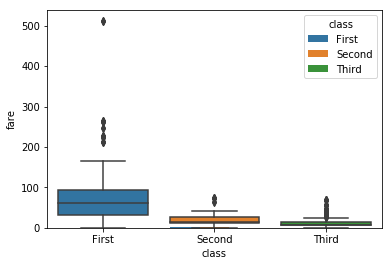

In [14]:
# [Answer to Ex. 5.1.1 here]
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
print(titanic.head())
f1 = sns.barplot(x='sex', y='survived', hue='class', data=titanic) 
f2 = sns.boxplot(x='class', y='fare', data=titanic)
print(f1)

#You cannot use a boxplot to explain a binary y-variable,
#as the boxplot shows quartiles and there are no quartiles in binary variables

> **Ex. 5.1.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
> _Discuss:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


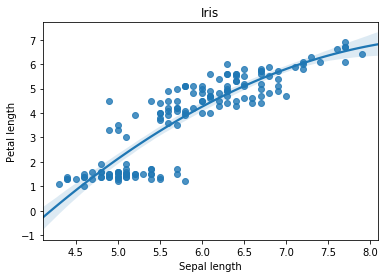

In [15]:
# [Answer to Ex. 5.1.2 here]
print(iris.head())
sns.regplot(x=iris['sepal_length'], y=iris['petal_length'], scatter=True, fit_reg=True, order=2)
plt.xlabel('Sepal length') 
plt.ylabel('Petal length')
plt.title('Iris')
plt.show()

> **Ex. 5.1.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file on your computer. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

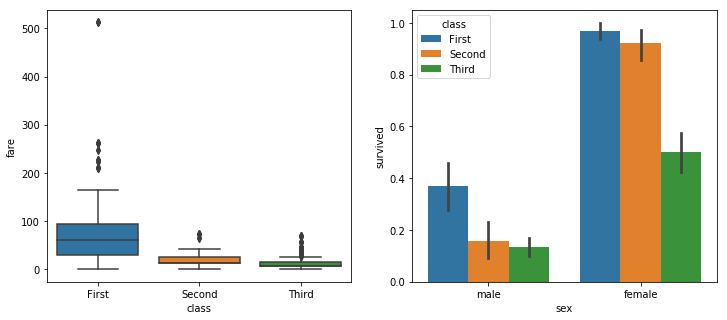

In [16]:
# [Answer to Ex. 5.1.3 here]
f, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=axes[1]) 
sns.boxplot(x='class', y='fare', data=titanic, ax=axes[0])

> **Ex. 5.1.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


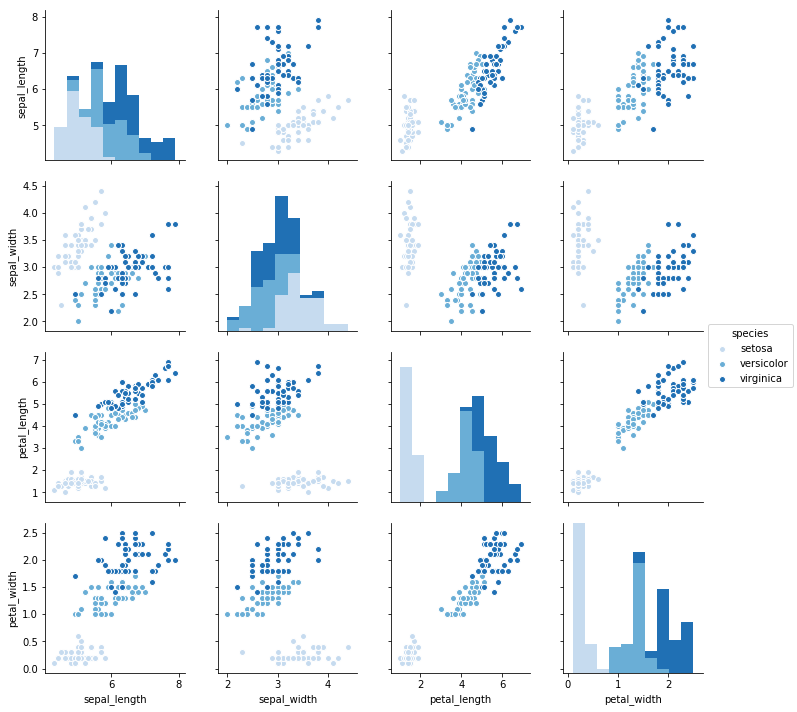

In [17]:
# [Answer to Ex. 5.1.4 here]
print(iris.head())
sns.pairplot(iris, hue='species', palette='Blues')

## Problems from exercise set 6

> _Note:_ A central part of these exercises and the ones from exercise set 7 is downloading data from the NOAA servers. If you cannot complete this part, you can download the data as csv files **from [github](https://github.com/abjer/sds/tree/master/material/session_7)**.

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.
>
>> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module.

In [19]:
# [Answer to Ex. 6.1.4]
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url,
                             compression='gzip',
                             header=None).iloc[:,:4]

df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_select = df_weather[(df_weather.station == 'ITE00100550') & (df_weather.obs_type == 'TMAX')].copy()
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])
df_select['datetime_dt'] = pd.to_datetime(df_select['datetime'], format = '%Y%m%d')
# month column
df_select['month'] = df_select.datetime_dt.dt.month
df_select.head()

# print(df_sorted['datetime'].dt.month)

df_sorted = df_sorted.assign(month=df_sorted['datetime'].dt.month)
df_datetime_sorted ['country_code'] = df_datetime_sorted['station'].astype(str).str[0:3]
df_datetime_sorted.head()

AttributeError: Can only use .dt accessor with datetimelike values

> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

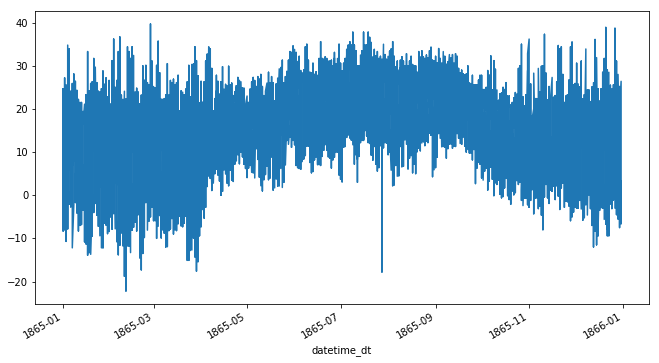

In [20]:
# [Answer to Ex. 6.1.5]
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
def weather(x):
    url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/' + x + '.csv.gz'
    df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]
    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    df_select = df_weather[(df_weather.obs_type == 'TMAX')].copy()
    df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
    df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value']) 
    df_sorted['datetime_dt'] = pd.to_datetime(df_sorted['datetime'], format = '%Y%m%d')
# month column
    df_sorted['month'] = df_sorted.datetime_dt.dt.month
    df_index = df_sorted
    df_index = df_index.sort_values(by='datetime', ascending=True)
    df_index['Country code'] = df_index['station'].astype(str).str[0:3]
    return df_index
    
weather_1865 = weather('1865')
#print(weather_1865)
#print(weather_1865)
#weather_1865_CC = weather_1865.set_index('Country code')


#print(weather_1865_CC)
#Bonus: To validate that your function works plot the 
#temperature curve for each country in the same window. Use plt.legend() to add a legend.
#print(weather_1865.head())
#weather_1865_CC.sort_values(by='Country code', ascending=True)
weather_1865\
    .set_index('datetime_dt')\
    .obs_value\
    .plot(figsize=[11,6])
plt.show()
#weather_1865_CC.distplot(figsize = (12, 5.5))

#country_code = ['Country code']

#for country in country_code:
    #CC = weather_1865_CC[weather_1865_CC['Country code'] == country]
    
    #Draw the density plot
    #sns.distplot(CC['month'], hist = False, kde = True, kde_kws = {'linewidth': 3})
#plt.xlabel('Month') 
#plt.ylabel('Temp')
#plt.title('Countries')
#weather_1874.plot

## Problems from exercise set 7

> _Note:_ Once again if you haven't managed to download the data from NOAA, you can refer to the github repo to get csv-files containing the required data.

In [22]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6

> **Ex. 7.1.1:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for our station with the ID _'ITE00100550'_ in 1864. 

> *Hint*: the method `describe` computes all these measures.

In [21]:
# [Answer to Ex. 7.1.1]
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url,
                             compression='gzip',
                             header=None).iloc[:,:4]

df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_select = df_weather[(df_weather.station == 'ITE00100550') & (df_weather.obs_type == 'TMAX')].copy()
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])
df_select['datetime_dt'] = pd.to_datetime(df_select['datetime'], format = '%Y%m%d')
# month column
df_select['month'] = df_select.datetime_dt.dt.month
df_select.head()

# Description of data
split_vars = ['month'] 
apply_vars = ['TMAX_F']
df_select\
    .groupby(split_vars)\
    [apply_vars]\
    .describe() #indeholder mean, std, min, 25%, 50%, 75% og max

TMAX_F                                                          
       count       mean       std    min     25%    50%     75%    max
month                                                                 
1       31.0  31.860645  5.516290  20.66  28.040  32.00  35.420  41.54
2       29.0  39.442069  5.456973  28.76  34.700  39.92  44.240  47.12
3       31.0  53.960000  5.004734  46.22  50.090  53.78  57.470  64.40
4       30.0  61.238000  8.076958  43.34  57.965  61.25  65.120  77.18
5       31.0  70.647742  5.962719  57.20  67.100  69.98  74.840  80.60
6       30.0  80.006000  5.267438  68.72  77.180  81.32  83.300  88.34
7       31.0  84.896774  3.443522  77.72  83.210  85.64  87.620  90.50
8       31.0  84.060645  6.830474  69.80  79.610  84.74  88.880  94.64
9       30.0  75.386000  6.517389  64.40  70.700  74.03  80.240  85.82
10      31.0  61.734839  4.276132  53.42  59.000  60.80  65.030  68.90
11      30.0  49.466000  4.702739  41.00  45.815  50.36  52.475  58.28
12      31.0  41.569032  3.916423  34.70  38.480  42.08  44.600  48.74

> **Ex. 7.1.2:** Get the processed data from years 1864-1867 as a list of DataFrames. Convert the list into a single DataFrame by concatenating vertically. 

In [22]:
# [Answer to Ex. 7.1.2]
weather_1864_1867 = pd.read_csv('/Users/victoriamariastokholmhundevad/Desktop/Egen kopi 1/material/session_7/weather_data_1864to1867.csv' , sep=",")
weather_1864_1867.head()

,station,datetime,obs_type,obs_value,TMAX_F,datetime_dt,year
0,SZ000006717,18640226,TMAX,-34.0,-29.20,1864-02-26,1864
1,SZ000006717,18640208,TMAX,-17.4,0.68,1864-02-08,1864
2,CA006158350,18640217,TMAX,-16.7,1.94,1864-02-17,1864
3,SZ000006717,18640103,TMAX,-16.5,2.30,1864-01-03,1864
4,CA006158350,18640102,TMAX,-16.1,3.02,1864-01-02,1864


> **Ex. 7.1.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1864-1867.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [23]:
# [Answer to Ex. 7.1.3]
station_location = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'
col_names = ['station', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'STATION', 'NAME', 'GSN FLAG', 'HCN/CRN FLAG', 'WMO ID']
station_location_df = pd.read_fwf(station_location, header=None, names=col_names) #if the data has fixed
#print(station_location_df.head())
new_weather = pd.merge(weather_1864_1867, station_location_df, how='left', on=['station'])
print(new_weather.head())

       station  datetime obs_type  obs_value  TMAX_F datetime_dt  year  \
0  SZ000006717  18640226     TMAX      -34.0  -29.20  1864-02-26  1864   
1  SZ000006717  18640208     TMAX      -17.4    0.68  1864-02-08  1864   
2  CA006158350  18640217     TMAX      -16.7    1.94  1864-02-17  1864   
3  SZ000006717  18640103     TMAX      -16.5    2.30  1864-01-03  1864   
4  CA006158350  18640102     TMAX      -16.1    3.02  1864-01-02  1864   

   LATITUDE  LONGITUDE  ELEVATION                  STATION NAME GSN FLAG  \
0   45.8667     7.1667     2472.0  COL DU GRAND ST-BERNARD  NaN      GSN   
1   45.8667     7.1667     2472.0  COL DU GRAND ST-BERNARD  NaN      GSN   
2   43.6667   -79.4000      113.0                  TORONTO  NaN      NaN   
3   45.8667     7.1667     2472.0  COL DU GRAND ST-BERNARD  NaN      GSN   
4   43.6667   -79.4000      113.0                  TORONTO  NaN      NaN   

   HCN/CRN FLAG  WMO ID  
0        6717.0     NaN  
1        6717.0     NaN  
2       71266.0     

## Problems from exercise set 8

> **Ex. 8.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [28]:
# [Answer to Ex. 8.1.2]
import requests 
import json
import pandas as pd
from pandas.io.json import json_normalize
url = 'https://job.jobnet.dk/CV/FindWork/Search'
response = requests.get(url)
d = requests.get(url).json()
d.keys()
jobnet_JPP = d['JobPositionPostings']

jobnet_dataframe = pd.DataFrame(jobnet_JPP) #sådan konverteres den til dataframe
jobnet_dataframe.head()


,AnonymousEmployer,AssignmentStartDate,AutomatchType,Country,EmploymentType,HasLocationValues,HiringOrgCVR,HiringOrgName,ID,IsExternal,...,UseWorkPlaceAddressForJoblog,Weight,WorkHours,WorkPlaceAbroad,WorkPlaceAddress,WorkPlaceCity,WorkPlaceNotStatic,WorkPlaceOtherAddress,WorkPlacePostalCode,WorkplaceID
0,False,0001-01-01T00:00:00,0,Danmark,,True,32139647,POWER PEOPLE DANMARK ApS,4831880,False,...,False,1.0,Fuldtid,False,,,False,True,,82395
1,False,0001-01-01T00:00:00,0,Danmark,,True,29810788,KRYB-I-LY A/S,4851508,False,...,True,1.0,Fuldtid,False,Kolding Landevej 160,Fredericia,False,False,7000,67143
2,False,0001-01-01T00:00:00,0,Danmark,,True,31544483,Café 18,4861474,False,...,True,1.0,Deltid,False,Krystalgade 18,Rønne,False,False,3700,0
3,False,0001-01-01T00:00:00,0,Danmark,,True,30982894,GG Ejendomsservice v/Mogens van der Goot,4830239,False,...,False,1.0,Fuldtid,False,,,True,False,,92386
4,False,0001-01-01T00:00:00,0,Danmark,,True,38661280,Keeperz ApS,4842917,False,...,True,1.0,Deltid,False,Edvard Thomsens Vej 63,København S,False,False,2300,122935


> **Ex. 8.1.3.:** Store and print the 'TotalResultCount' value for later use. Also create a dataframe from the 'JobPositionPostings' field in the json. 

In [29]:
# [Answer to Ex. 8.1.3]
trc = d['TotalResultCount']
trc

16004

## Problems from exercise set 9

> **Ex. 9.2.1:** Load the data used in the exercise using the `pd.read_csv` function. (Hint: path to file can be both a url or systempath). 

>Define a variable `sample_string = '\n'.join(df.sample(2000).reviewBody)` as sample of all the reviews that you will practice on.  (Run it once in a while to get a new sample for potential differences).
Imagine we were a company wanting to find the reviews where customers are concerned with the price of a service. They decide to write a regular expression to match all reviews where a currencies and an amount is mentioned. 

In [ ]:
# [Answer to Ex. 9.2.1]

> **Ex. 9.2.2:** 
> Write an expression that matches both the dollar-sign (\$) and dollar written literally, and the amount before or after a dollar-sign. Remember that the "$"-sign is a special character in regular expressions. Explore and refine using the explore_pattern function in the package I created called explore_regex. 
```python
import explore_regex as e_re
explore_regex = e_re.Explore_Regex(sample_string) # Initaizlie the Explore regex Class.
explore_regex.explore_pattern(pattern) # Use the .explore_pattern method.
```


Start with exploring the context around digits ("\d") in the data. 

In [ ]:
# [Answer to Ex. 9.2.2]

> **Ex.9.2.3** Use the .report() method. e_re.report(), and print the all patterns in the development process using the .pattern method - i.e. e_re.patterns 

In [ ]:
# [Answer to Ex. 9.2.3]